In [1]:
!git clone https://github.com/markoris/surrogate_kne.git

fatal: destination path 'surrogate_kne' already exists and is not an empty directory.


In [2]:
import sys
sys.path.append("surrogate_kne/")

In [6]:
import os, glob
os.environ["OMP_NUM_THREADS"] = "12"
from natsort import natsorted
import numpy as np
import save_sklearn_gp as ssg

# making a size (9, 5) array with each row having 5 input parameters (md, vd, mw, vw, wav) for all wavelength bands

inputs = np.array([0.097050, 0.197642, 0.083748, 0.297978]) # parameters used for off-sample prediction in Figure 4 of paper
wavs = np.array([476., 621., 754., 900., 1020., 1220., 1630., 2190.]).reshape(8, 1)
inputs = np.tile(inputs, wavs.shape[0]).reshape(-1, 4)
inputs = np.hstack((inputs, wavs))

# loading all the models from the family trained using a pole-on viewing angle

files = glob.glob('surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/*')
files = natsorted(files) # sorting is necessary! otherwise time will be out of order
print(len(files),'files')

# loop through all the individual time steps, making a prediction at each
i=0
for file in files:
	i+=1
	fname = file+'/model'
	if i%10==0: print(str(i)+'/'+str(len(files)))
	model = ssg.load_gp(fname) # loading Gaussian Process from hyperparameters saved in .json format
	pred, err = ssg.predict(model, inputs, output='mags')

	try:
		lc = np.append(lc, pred[None, :], axis=0)
		errs = np.append(errs, err[None, :], axis=0)
	except NameError:
		lc = pred[None, :] # if first time point, initializes the light curve array
		errs = err[None, :] # same as above, but for errors

264 files
loading surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/t_0.125_days/model
loading surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/t_0.128_days/model
loading surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/t_0.131_days/model
loading surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/t_0.133_days/model
loading surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/t_0.136_days/model
loading surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/t_0.139_days/model
loading surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/t_0.142_days/model
loading surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/t_0.145_days/model
loading surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/t_0.149_days/model
loading surrogate_kne/surrogate_data/2021_Wollaeger_TorusPeanutWind2/theta00deg/t_0.152_days/model


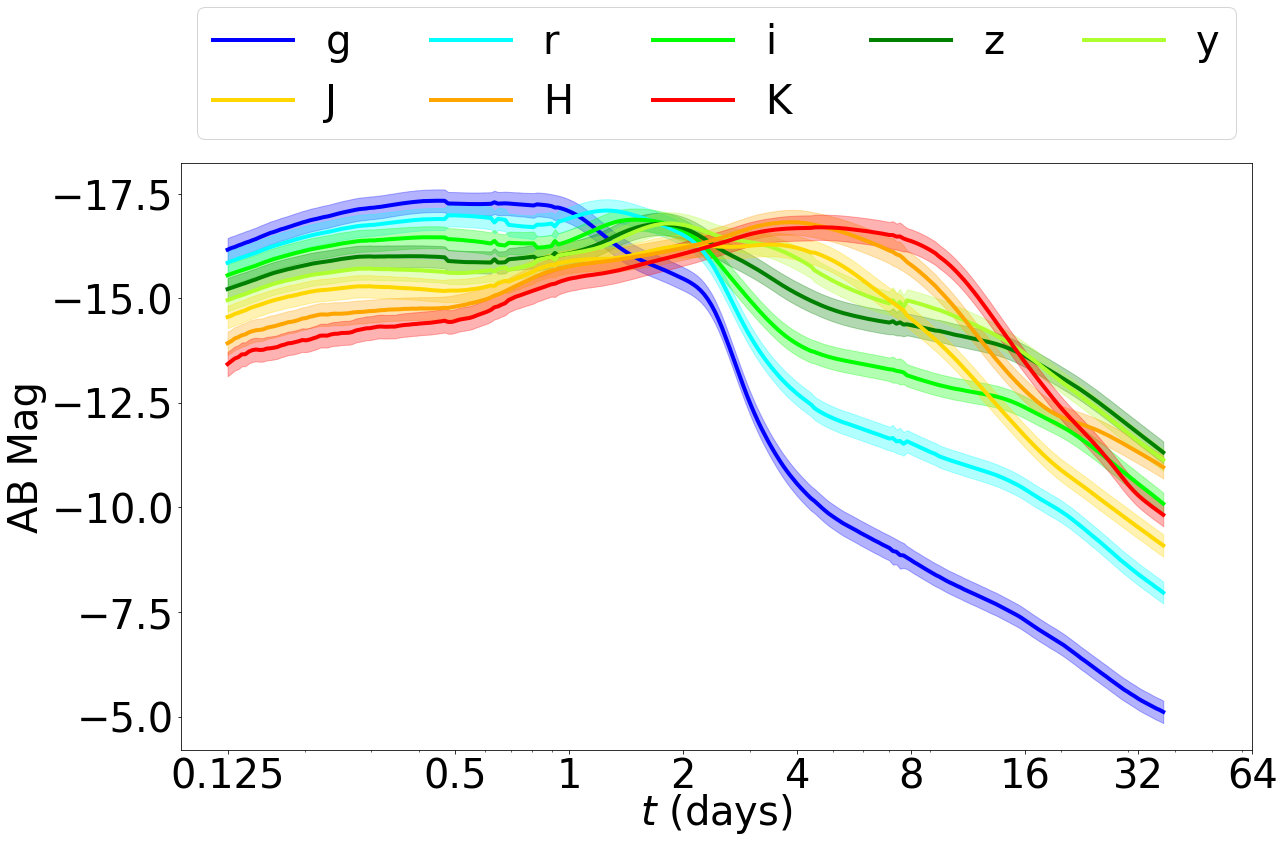

In [14]:
from matplotlib import ticker
import matplotlib.pyplot as plt
import itertools
import numpy as np

def flip(items, ncol):
    '''
    credit to Avaris on StackOverflow for this function
    '''
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

times = np.logspace(np.log10(0.125), np.log10(37.239195485411194), 264)

colors = {"g": "blue", "r": "cyan", "i": "lime", "z": "green", "y": "greenyellow", "J": "gold",
         "H": "orange", "K": "red", "S": "darkred"}
wavelengths = 'grizyJHKS'
plt.figure(figsize=(19.2, 10.8))
plt.rc('font', size = 40)
plt.rc('lines', lw=4)
for band in range(lc.shape[1]):
	plt.plot(times, lc[:, band], color=colors[wavelengths[band]], label=wavelengths[band])
	plt.fill_between(times, lc[:, band]-errs[:, band], lc[:, band]+errs[:, band], color=colors[wavelengths[band]], alpha=0.3)
plt.xscale('log')
plt.gca().set_xticks([0.125, 0.5, 1, 2, 4, 8, 16, 32, 64])
plt.gca().get_xaxis().set_major_formatter(ticker.FormatStrFormatter('%g'))
plt.xlabel(r"$t$ (days)", labelpad=-5)
plt.ylabel("AB Mag")
plt.gca().invert_yaxis()
handles, labels = plt.gca().get_legend_handles_labels()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(flip(handles, 5), flip(labels, 5), ncol=5, bbox_to_anchor=(0.5, 1.3), loc='upper center')
plt.savefig('pred_compact.png')

In [15]:
i=0
for file in files:
	i+=1
	fname = file+'/model'
	if i%10==0: print(str(i)+'/'+str(len(files)))
	model = ssg.load_gp(fname) # loading Gaussian Process from hyperparameters saved in .json format

10/264
20/264
30/264
40/264
50/264
60/264
70/264
80/264
90/264
100/264
110/264
120/264
130/264
140/264
150/264
160/264
170/264
180/264
190/264
200/264
210/264
220/264
230/264
240/264
250/264
260/264


In [17]:
lc.shape


(264, 8)

In [16]:
inputs

array([[9.70500e-02, 1.97642e-01, 8.37480e-02, 2.97978e-01, 4.76000e+02],
       [9.70500e-02, 1.97642e-01, 8.37480e-02, 2.97978e-01, 6.21000e+02],
       [9.70500e-02, 1.97642e-01, 8.37480e-02, 2.97978e-01, 7.54000e+02],
       [9.70500e-02, 1.97642e-01, 8.37480e-02, 2.97978e-01, 9.00000e+02],
       [9.70500e-02, 1.97642e-01, 8.37480e-02, 2.97978e-01, 1.02000e+03],
       [9.70500e-02, 1.97642e-01, 8.37480e-02, 2.97978e-01, 1.22000e+03],
       [9.70500e-02, 1.97642e-01, 8.37480e-02, 2.97978e-01, 1.63000e+03],
       [9.70500e-02, 1.97642e-01, 8.37480e-02, 2.97978e-01, 2.19000e+03]])